# Capstone Part 4 - Data Preprocessing / Modelling

In [57]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [58]:
combhotel_clean_df = pd.read_csv('combhotel_clean_df_v2.csv')

In [59]:
combhotel_clean_df.sample(3)

,hotel,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,IsCanceled,ADR_bin,got_assigned_room
39392,city hotel,110,2016,April,18,30,2,2,2,0,...,Transient,89.25,0,0,Canceled,2016-04-26,2016-04-30,True,51-100,True
25414,resort hotel,0,2016,December,51,12,1,0,1,0,...,Transient,39.00,0,0,Check-Out,2016-12-13,2016-12-12,False,0-50,True
49786,city hotel,40,2017,June,24,11,2,2,1,0,...,Transient,110.00,0,1,Canceled,2017-05-03,2017-06-11,True,101-150,True


In [60]:
combhotel_clean_df.columns

Index(['hotel', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'ArrivalDate', 'IsCanceled', 'ADR_bin', 'got_assigned_room'],
      dtype='object')

In [61]:
numerical_columns = ['LeadTime', 'StaysInWeekendNights','StaysInWeekNights','Adults','Children',
                   'Babies','PreviousCancellations','PreviousBookingsNotCanceled', 'BookingChanges',
                   'DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']

binary_columns = ['IsCanceled', 'IsRepeatedGuest', 'got_assigned_room']

categorical_columns = ['hotel','Meal', 'Country', 'MarketSegment', 'DistributionChannel',
                       'ReservedRoomType', 'AssignedRoomType','DepositType', 'Agent', 'Company',
                       'CustomerType','ReservationStatus', 'ADR_bin']

date_not_datetime_columns = ['ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth']

datetime_columns = ['ReservationStatusDate','ArrivalDate']

# Preprocessing

Selecting feature columns

In [62]:
feature_cols = ['hotel','ADR', 'LeadTime', 'ArrivalDateMonth','StaysInWeekendNights', 'StaysInWeekNights','MarketSegment',
                'DistributionChannel','IsRepeatedGuest','CustomerType','got_assigned_room']

cat_cols = ['hotel', 'ArrivalDateMonth','MarketSegment','DistributionChannel','CustomerType']

binary_cols =  ['IsRepeatedGuest','got_assigned_room']

num_cols = ['LeadTime','StaysInWeekendNights','StaysInWeekNights', 'ADR']

In [63]:
combhotel_preprocess_df = combhotel_clean_df[feature_cols]

**one-hot encode**

In [64]:
for col in cat_cols:
    combhotel_preprocess_df = pd.concat([combhotel_preprocess_df,pd.get_dummies(combhotel_preprocess_df[col], prefix= col, drop_first= True)],axis = 1)

Dropping original category columns

In [65]:
combhotel_preprocess_df = combhotel_preprocess_df.drop(cat_cols,axis = 1)

In [66]:
combhotel_preprocess_df.columns

Index(['ADR', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights',
       'IsRepeatedGuest', 'got_assigned_room', 'hotel_resort hotel',
       'ArrivalDateMonth_August', 'ArrivalDateMonth_December',
       'ArrivalDateMonth_February', 'ArrivalDateMonth_January',
       'ArrivalDateMonth_July', 'ArrivalDateMonth_June',
       'ArrivalDateMonth_March', 'ArrivalDateMonth_May',
       'ArrivalDateMonth_November', 'ArrivalDateMonth_October',
       'ArrivalDateMonth_September', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'CustomerType_Group', 'CustomerType_Transient',
       'CustomerType_Transient-Party'],
      dtype='object')

In [67]:
combhotel_preprocess_df.sample(5)

,ADR,LeadTime,StaysInWeekendNights,StaysInWeekNights,IsRepeatedGuest,got_assigned_room,hotel_resort hotel,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,...,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
11484,155.5,0,1,0,False,True,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
16594,66.0,33,0,1,False,True,True,False,False,True,...,False,False,False,True,False,False,True,False,True,False
15092,48.0,0,1,0,False,False,True,False,False,False,...,False,False,False,True,False,False,True,True,False,False
32663,118.0,240,2,2,False,True,True,True,False,False,...,False,False,True,False,False,False,True,False,False,True
75234,107.0,24,0,3,False,True,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


## train_test_split


In [68]:
X = combhotel_preprocess_df
y = combhotel_clean_df['IsCanceled']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

## Scaling of numerical columns

In [71]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [72]:
X_train = X_train.drop(num_cols, axis = 1)
X_test = X_test.drop(num_cols, axis = 1)

In [73]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns, index = X_train_num.index)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns, index = X_test_num.index)

In [74]:
X_train_comb = pd.concat([X_train_num_scaled,X_train],axis =1 )
X_test_comb = pd.concat([X_test_num_scaled,X_test],axis =1 )

In [75]:
X_train_comb

,LeadTime,StaysInWeekendNights,StaysInWeekNights,ADR,IsRepeatedGuest,got_assigned_room,hotel_resort hotel,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,...,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
18329,0.559536,-0.978183,0.182951,0.145713,False,True,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
50456,2.702050,-0.978183,-0.793342,-0.335527,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
81487,1.654081,0.964774,-0.793342,-0.335527,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
22728,2.981508,-0.978183,0.182951,-0.781978,False,True,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
27761,-0.930909,-0.978183,-0.305196,-1.323131,False,True,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-0.290484,0.964774,-0.793342,0.107059,False,True,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
54886,-0.814468,-0.006705,0.671097,-0.454387,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
76820,-0.895977,0.964774,0.182951,-0.579046,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
860,0.396518,-0.978183,0.182951,0.829886,False,True,True,True,False,False,...,False,False,False,True,False,False,True,False,True,False


## Handling imbalances

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_comb, y_train)

## Training a model using KNN

In [77]:
# searching for the best K to give higest accuracy
accuracy_list = []
for k in range(1,81):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    y_pred_class = knn.predict(X_test_comb)
    accuracy_list.append(metrics.accuracy_score(y_test,y_pred_class))

accuracy_result = pd.DataFrame({'K':range(1,81), 'accuracy':accuracy_list})

In [78]:
fig = px.line(accuracy_result, x = 'K', y = 'accuracy')
fig.show()

K = 2 gives the highest accuracy at 72.4%  
K = 3 gives 68.8% accuracy

In [79]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res,y_train_res)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [80]:
y_pred = knn.predict(X_test_comb)

## Accuracy score of KNN model

In [81]:
print (metrics.accuracy_score(y_test,y_pred))

0.6828272371750632


## Recall score of KNN model

In [82]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print (recall)


0.5983140147523709


## Precision Score of KNN model

In [83]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print (precision)

0.44029156327543423


## F1 Score

In [84]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print (f1)

0.5072813365496293


## Confusion matrix

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [86]:
cm = confusion_matrix(y_test, y_pred)

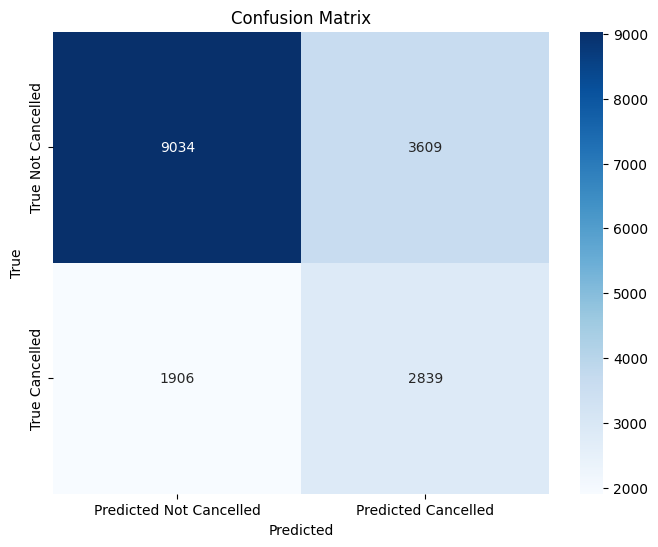

In [87]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Cancelled', 'Predicted Cancelled'], yticklabels=['True Not Cancelled', 'True Cancelled'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()